In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv("../data/raw/email_spam_indo.csv")
df.head()

,Kategori,Pesan
0,spam,Secara alami tak tertahankan identitas perusah...
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak..."


In [29]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kategori  2636 non-null   object
 1   Pesan     2636 non-null   object
dtypes: object(2)
memory usage: 41.3+ KB


,Kategori,Pesan
count,2636,2636
unique,2,2620
top,spam,Re: Presentasi ALP FYI Vince - - - - - - - - -...
freq,1368,2


In [30]:
df.isnull().sum()

Kategori    0
Pesan       0
dtype: int64

In [31]:
def simple_clean(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)   # hanya huruf
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["clean_text"] = df["Pesan"].apply(simple_clean)

In [32]:
from collections import Counter

# Pisahkan dataset per kategori
df_spam = df[df["Kategori"] == "spam"]
df_nonspam = df[df["Kategori"] == "ham"]

# Kumpulkan semua kata
words_spam = " ".join(df_spam["clean_text"]).split()
words_nonspam = " ".join(df_nonspam["clean_text"]).split()

# Hitung frekuensi
top10_spam = Counter(words_spam).most_common(10)
top10_nonspam = Counter(words_nonspam).most_common(10)

# Ubah jadi DataFrame agar mudah dipakai untuk visualisasi
df_top10_spam = pd.DataFrame(top10_spam, columns=["word", "count"])
df_top10_nonspam = pd.DataFrame(top10_nonspam, columns=["word", "count"])

df_top10_spam, df_top10_nonspam


(     word  count
 0    anda   8428
 1    yang   7296
 2     dan   6532
 3   untuk   5896
 4      di   4426
 5     ini   4212
 6    kami   3315
 7    dari   2893
 8  dengan   2818
 9   tidak   2724,
      word  count
 0    saya   6435
 1   untuk   6351
 2     dan   6246
 3    yang   5877
 4    anda   5167
 5      di   4206
 6   enron   3502
 7     ini   3310
 8  dengan   3127
 9    akan   3107)

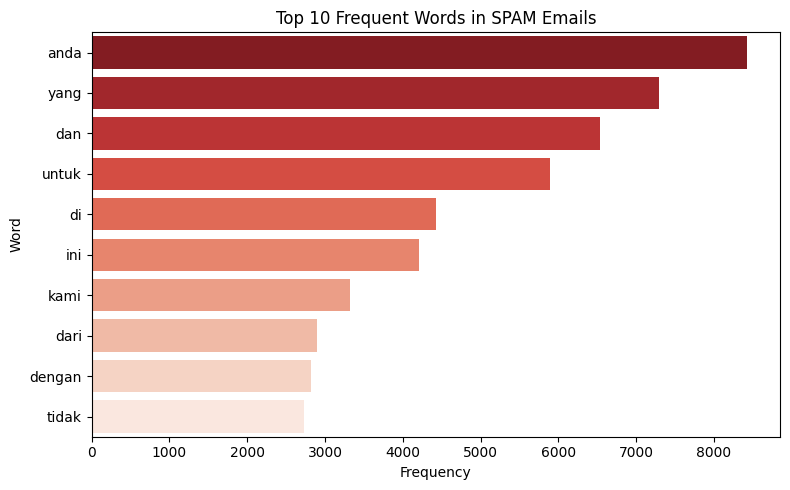

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_top10_spam, x="count", y="word", palette="Reds_r")
plt.title("Top 10 Frequent Words in SPAM Emails")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


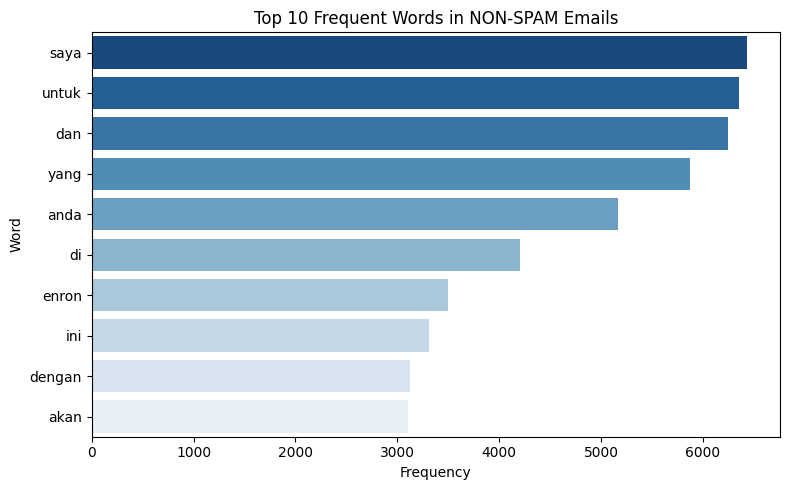

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_top10_nonspam, x="count", y="word", palette="Blues_r")
plt.title("Top 10 Frequent Words in NON-SPAM Emails")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


In [35]:
plt.savefig("../outputs/logs/top10_spam_words.png", dpi=300)
plt.close()

plt.savefig("../outputs/logs/top10_nonspam_words.png", dpi=300)
plt.close()


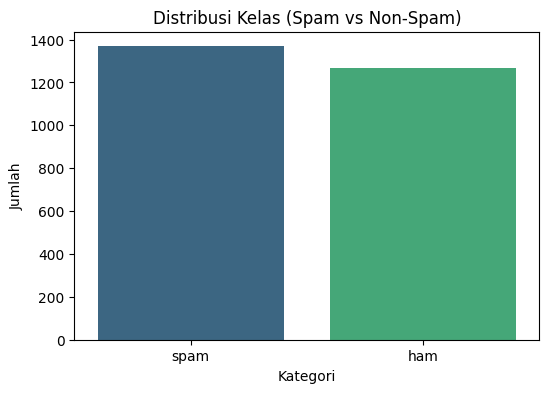

Kategori
spam    1368
ham     1268
Name: count, dtype: int64

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Kategori", palette="viridis")
plt.title("Distribusi Kelas (Spam vs Non-Spam)")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()

df["Kategori"].value_counts()

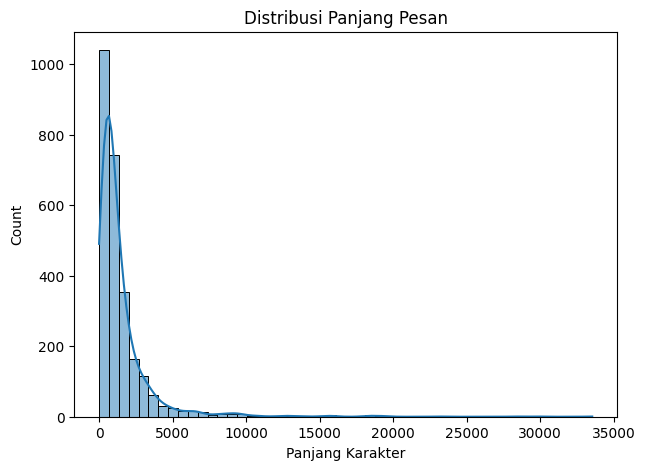

In [37]:
df["length"] = df["Pesan"].astype(str).apply(len)

plt.figure(figsize=(7,5))
sns.histplot(df["length"], bins=50, kde=True)
plt.title("Distribusi Panjang Pesan")
plt.xlabel("Panjang Karakter")
plt.show()

In [38]:
df.groupby("Kategori")["length"].mean()

Kategori
ham     1621.464511
spam    1351.805556
Name: length, dtype: float64

In [39]:
print("Jumlah data:", len(df))
print("Jumlah spam:", sum(df['Kategori']=='spam'))
print("Jumlah non-spam:", sum(df['Kategori']=='ham'))
print("Rata-rata panjang teks:", df['length'].mean())

Jumlah data: 2636
Jumlah spam: 1368
Jumlah non-spam: 1268
Rata-rata panjang teks: 1481.5201062215478
